In [7]:
from filamentlib import VField
import matplotlib.pyplot as plt
import numpy as np

# The First Time-Step Attempts

## Updated Circle Filament

In [8]:
def UpdateRegularBiotSavart( curve: np.array, curveTangent: np.array, fieldPoints: np.array, epsilon, tspan:list, numOfSteps ):
    curves = np.zeros( ( numOfSteps + 1, len( fieldPoints[:,0] ), len( fieldPoints[0,:] ) ) )

    deltaTime = ( tspan[1] - tspan[0] ) / numOfSteps

    curves[0,:,:] = curve
    for i in range(1, numOfSteps + 1):
        curves[i,:,:] = curves[i-1,:,:] + deltaTime * VField.RegularBiotSavart( curve, curveTangent, fieldPoints, epsilon )

    return curves

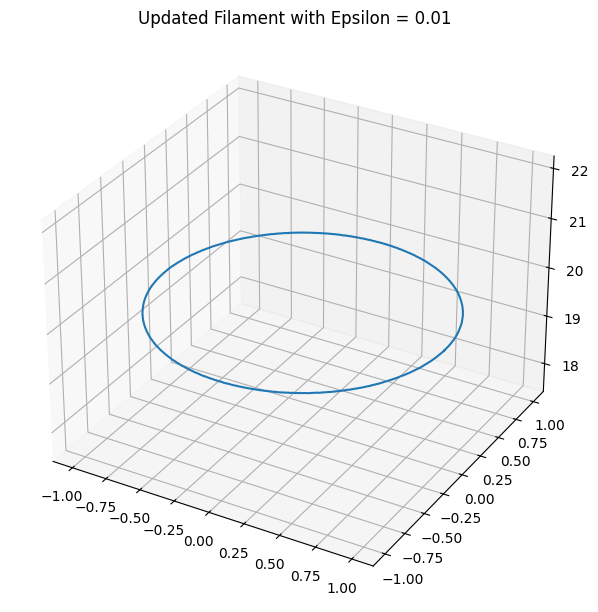

In [12]:
# Make a circle filament
circle = lambda t : [np.cos(t), np.sin(t), t * 0]
dCircle = lambda t : [-np.sin(t), np.cos(t), t * 0]
circlePoints = np.linspace(0,2*np.pi,1000)

# Calculate points on the circle to use
s = np.array(circle(circlePoints))
ds = np.array(dCircle(circlePoints))

# Set the regularization constant here
eps = 1e-2

# Calculate the two V-Fields
FieldPoints = UpdateRegularBiotSavart( s, ds, s, eps, [0,1], 2 )

fig = plt.figure(figsize=(6, 10))
ax1 = fig.add_subplot(111, projection='3d')
ax1.plot(FieldPoints[1,0,:], FieldPoints[1,1,:], FieldPoints[1,2,:])

plt.title(f'Updated Filament with Epsilon = {eps}')
plt.tight_layout()
plt.show()

## Updated Ellipse Filament

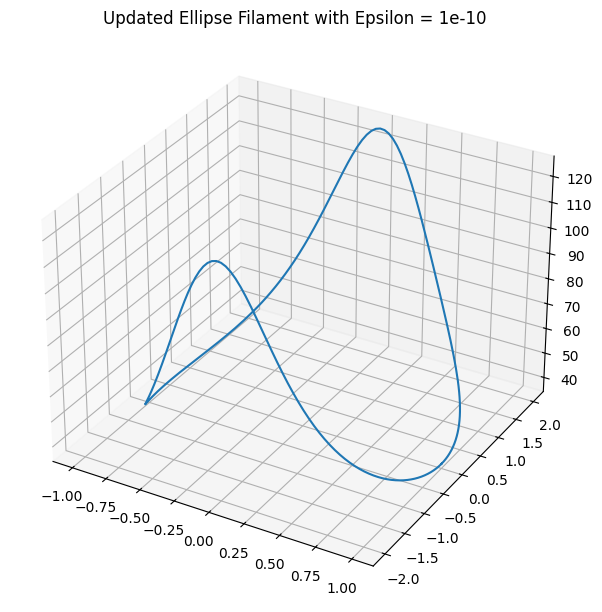

In [17]:
# Make the ellipse functions
E = lambda t: [ np.cos(t), 2 * np.sin(t), t*0 ]
dE = lambda t: [ -np.sin(t), 2 * np.cos(t), t*0 ]
EPoints = np.linspace( 0, 2 * np.pi, 200 )

# Find values on the ellipse
s = np.array( E(EPoints) )
ds = np.array( dE(EPoints) )

# Set the regularization constant here
eps = 1e-10

# Calculate the two V-Fields
FieldPoints = UpdateRegularBiotSavart( s, ds, s, eps, [0,1], 2 )

fig = plt.figure(figsize=(6, 10))
ax1 = fig.add_subplot(111, projection='3d')
ax1.plot(FieldPoints[1,0,:], FieldPoints[1,1,:], FieldPoints[1,2,:])

plt.title(f'Updated Ellipse Filament with Epsilon = {eps}')
plt.tight_layout()
plt.show()

## Updated Pringle Filament

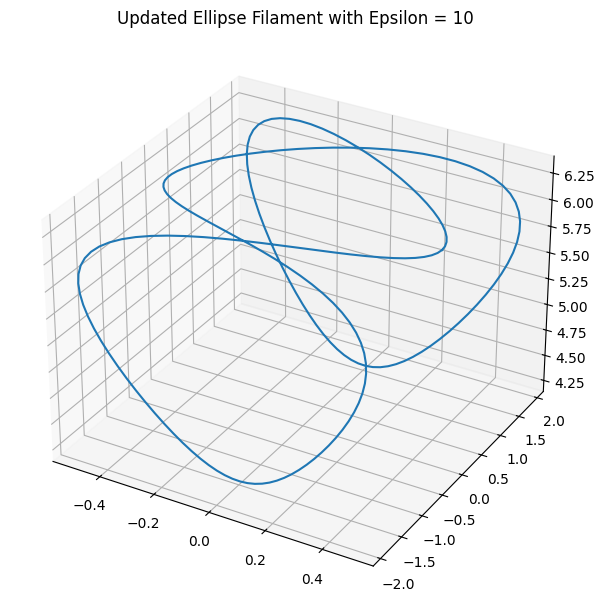

In [29]:
# Make the Pringle function
P = lambda t: [ np.cos(t), np.sin(t), np.square(np.cos(t)) - np.square(np.sin(t)) ]
dP = lambda t: [ -np.sin(t), np.cos(t), 2*np.cos(t)*(-1)*np.sin(t) - 2*np.sin(t)*np.cos(t) ]
PPoints = np.linspace( 0, 2 * np.pi, 200 )

# Find values on the pringle
s = np.array( P(PPoints) )
ds = np.array( dP(PPoints) )

# Set the regularization constant here
eps = 1e-2

# Calculate the two V-Fields
FieldPoints = UpdateRegularBiotSavart( s, ds, s, eps, [0,1], 2 )

fig = plt.figure(figsize=(6, 10))
ax1 = fig.add_subplot(111, projection='3d')
ax1.plot(FieldPoints[1,0,:], FieldPoints[1,1,:], FieldPoints[1,2,:])

plt.title(f'Updated Pringle Filament with Epsilon = {eps}')
plt.tight_layout()
plt.show()